In [22]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
file = 'data_clean.csv'
df = pd.read_csv(file, sep='\t')

In [25]:
# create year
df['year'] = df['start_date'].astype(str).str[0:4].astype(int)

In [26]:
# remove 1993
df = df[df['year'] != 1993]

## Targets of Terrorism

In [27]:
targtype = df[['targtype1_txt']]
targtype = targtype.groupby(['targtype1_txt']).size().reset_index(name="count")

In [28]:
targlist = targtype.sort_values('count')
targlist = targlist['targtype1_txt'].values.tolist()[:-5]

In [29]:
targtype_year = df[['year','targtype1_txt']]
targtype_year = targtype_year.replace(targlist, 'Other')
targtype_year = targtype_year.groupby(['targtype1_txt', 'year']).size().reset_index(name="count")

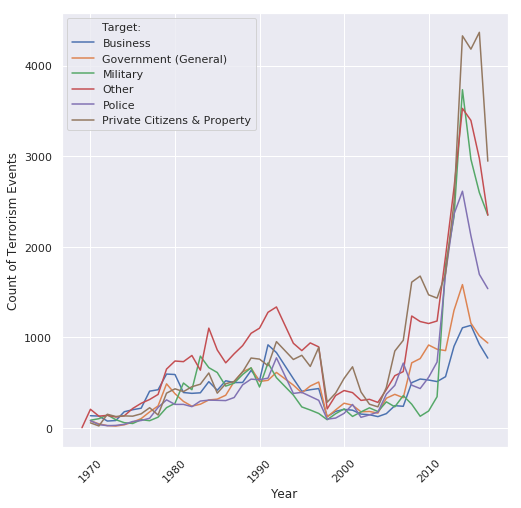

In [45]:
plt.figure(figsize=(8, 8))
sns.lineplot(x='year', y='count', hue='targtype1_txt', data=targtype_year)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count of Terrorism Events')
legend = plt.legend()
legend.texts[0].set_text("Target:")

## International and Domestic Terrorism

In [32]:
int_log = df[['year','INT_LOG']]
int_log.loc[df['INT_LOG'] == -9, 'INT_LOG'] = 'Unknown'
int_log.loc[df['INT_LOG'] == 0, 'INT_LOG'] = 'Domestic'
int_log.loc[df['INT_LOG'] == 1, 'INT_LOG'] = 'International'

/homes/jr315/p36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
int_log = int_log.groupby(['year','INT_LOG']).size().reset_index(name="count")
int_log = int_log.sort_values('year')

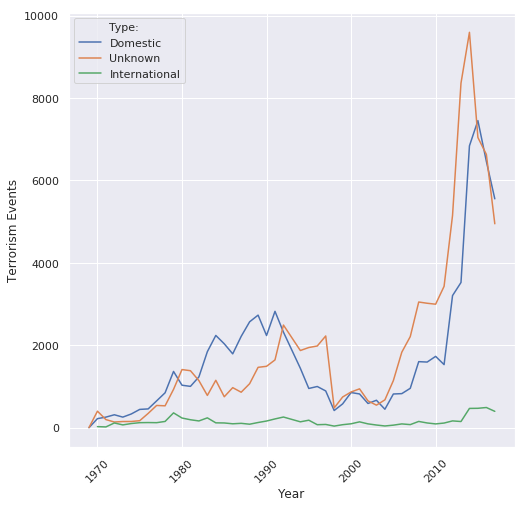

In [44]:
plt.figure(figsize=(8, 8))
sns.lineplot(x='year', y='count', hue='INT_LOG', data=int_log)
plt.xlabel('Year')
plt.ylabel('Terrorism Events')
plt.xticks(rotation=45)
legend = plt.legend()
legend.texts[0].set_text("Type:")

## Terrorist Groups

In [36]:
gname_year = df[['year','gname', 'nkill']]
gname_year = gname_year.loc[gname_year['year'] >= 2000]
gname_year = gname_year.loc[gname_year['gname'] != 'Unknown']
gname_year_g = gname_year.groupby(['year','gname']).sum().sort_values('nkill')
gname_year_g = gname_year_g.reset_index()

In [43]:
gname_list = gname_year[['gname', 'nkill']]
gname_list = gname_list.groupby(['gname'], as_index=False).sum().sort_values('nkill')
gname_list = gname_list.tail(10).values.tolist()
gname_list = [e[0] for e in gname_list]

In [38]:
gname_year_g = gname_year_g[gname_year_g['gname'].isin(gname_list)]

In [39]:
gname_year['nkill'] = gname_year['nkill'].replace(np.nan, 0)
gname_year = gname_year.sort_values('nkill')
gname_year
gname_year = gname_year[(gname_year.gname=='Taliban') | (gname_year.gname=='Boko Haram') | (gname_year.gname=='Islamic State of Iraq and the Levant (ISIL)')]

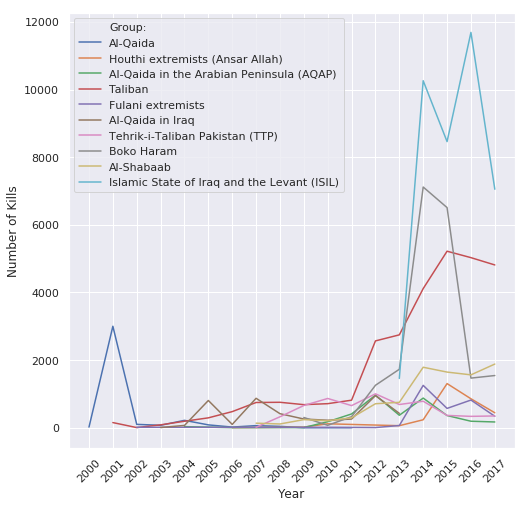

In [54]:
plt.figure(figsize=(8, 8))
sns.lineplot(x='year', y='nkill', hue='gname', data=gname_year_g)
plt.xticks(np.arange(2000, 2018, 1))
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Kills')
legend = plt.legend()
legend.texts[0].set_text("Group:")

## Countries Experiencing Terrorism

In [41]:
country_exp_time = df[['year', 'country_txt']]
country_exp_time = country_exp_time.groupby(['year'])['country_txt'].nunique()/195*100

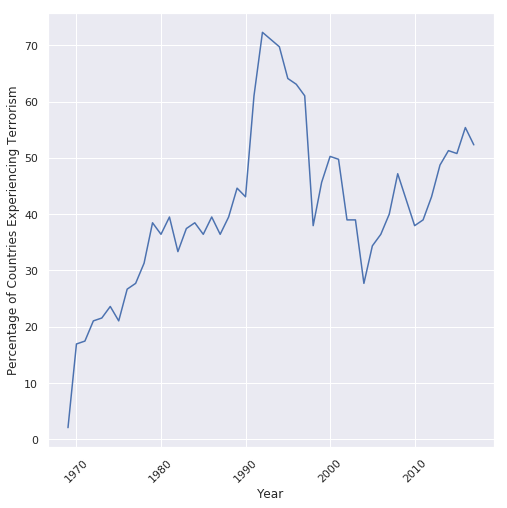

In [55]:
plt.figure(figsize=(8, 8))
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Percentage of Countries Experiencing Terrorism')
sns.lineplot(data=country_exp_time, palette='inferno')